In [133]:
import os
import warnings
import cv2 as cv
import zipfile as zipf
import numpy as np
import pandas as pd
import tensorflow as tensorflow
from tensorflow import keras
from matplotlib import pyplot as plt
from PIL import Image
from tensorflow import keras
import glob
import shutil
import random
import pickle

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np

import os
import PIL
import tensorflow as tf
from tensorflow import keras


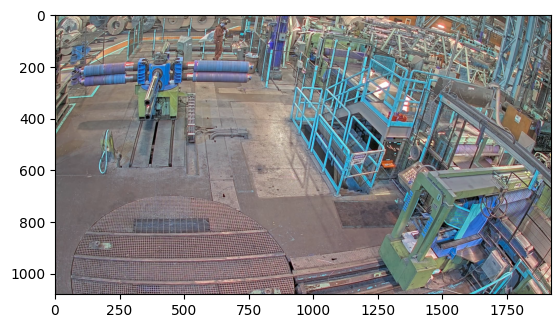

In [134]:
img = cv.imread("./resources/active_1.png")
# img = img/255.
plt.imshow(img)

In [135]:
fl = img[628][358]
fl

array([126, 120, 125], dtype=uint8)

In [136]:
middle = img[769][783]
middle

array([136, 122, 121], dtype=uint8)

In [137]:
fr = img[843][1608]
fr

array([ 67, 124, 221], dtype=uint8)

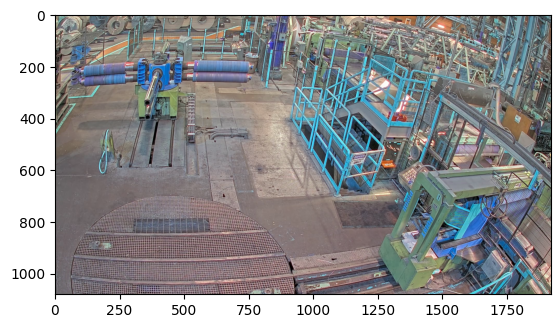

In [138]:
img2 = cv.imread("./resources/active_2.png")
plt.imshow(img2)

In [139]:
fl = img2[628][358]
fl

array([122, 118, 123], dtype=uint8)

In [140]:
middle = img2[732][776]
middle

array([136, 121, 117], dtype=uint8)

In [141]:
fr = img2[843][1608]
fr

array([ 66, 122, 221], dtype=uint8)

In [141]:
#step 1 create a dataframe of type filename | image-value
#step 1 create a collection of filenames and corresponding image values

In [143]:
listImages = os.listdir('./Slitter2BladePositionClassifier/Slitter2BladePositionClassifierCamera/raw')

In [144]:
listImages

['Cap_0_2022-12-19T15.29.04.125277.png',
 'Cap_0_2022-12-19T17.59.26.252058.png',
 'Cap_0_2022-12-29T16.44.48.957711.png',
 'Cap_0_2022-12-30T09.55.07.408313.png',
 'Cap_1000_2022-12-19T20.48.45.374740.png',
 'Cap_1001_2022-12-19T20.48.55.556584.png',
 'Cap_1002_2022-12-19T20.49.05.713048.png',
 'Cap_1003_2022-12-19T20.49.15.880714.png',
 'Cap_1004_2022-12-19T20.49.26.054151.png',
 'Cap_1005_2022-12-19T20.49.36.188640.png',
 'Cap_1006_2022-12-19T20.49.46.319140.png',
 'Cap_1007_2022-12-19T20.49.56.448789.png',
 'Cap_1008_2022-12-19T20.50.06.590522.png',
 'Cap_1009_2022-12-19T20.50.16.775306.png',
 'Cap_100_2022-12-19T15.46.12.518712.png',
 'Cap_100_2022-12-19T18.16.22.316235.png',
 'Cap_100_2022-12-29T17.01.57.067617.png',
 'Cap_100_2022-12-30T10.12.05.262569.png',
 'Cap_1010_2022-12-19T20.50.26.923268.png',
 'Cap_1011_2022-12-19T20.50.37.095623.png',
 'Cap_1012_2022-12-19T20.50.47.235611.png',
 'Cap_1013_2022-12-19T20.50.57.374157.png',
 'Cap_1014_2022-12-19T20.51.07.547753.png',
 'Ca

In [147]:
corePath = './Slitter2BladePositionClassifier/Slitter2BladePositionClassifierCamera/raw'
print(corePath + '/' +  listImages[1])
xyz = [ cv.imread(corePath + '/'+ x) for x in listImages]
xyz

./Slitter2BladePositionClassifier/Slitter2BladePositionClassifierCamera/rawCap_0_2022-12-19T17.59.26.252058.png


[array([[[176, 166, 146],
         [174, 164, 144],
         [170, 160, 140],
         ...,
         [109, 135, 129],
         [ 73, 102,  96],
         [ 68,  97,  91]],
 
        [[176, 166, 146],
         [174, 164, 144],
         [170, 160, 140],
         ...,
         [102, 128, 122],
         [ 96, 125, 119],
         [105, 134, 128]],
 
        [[175, 165, 145],
         [173, 163, 143],
         [170, 160, 140],
         ...,
         [116, 145, 139],
         [126, 160, 153],
         [145, 179, 172]],
 
        ...,
 
        [[108, 100, 104],
         [109, 101, 105],
         [111, 103, 107],
         ...,
         [116, 108,  89],
         [114, 114,  94],
         [116, 116,  96]],
 
        [[105, 100, 103],
         [106, 101, 104],
         [110, 105, 108],
         ...,
         [112, 105,  83],
         [120, 119,  96],
         [126, 125, 102]],
 
        [[104,  99, 102],
         [106, 101, 104],
         [111, 106, 109],
         ...,
         [110, 103,  81],
  

In [159]:
def sortByPixelAlgo(imageCollection):
    activeList = []
    inactiveList = []
    transitionList = []
    cantClassifyList = []
    for image in imageCollection:
        if (image[628][358][2] >= 124 - 20 and image[628][358][2] <= 124 + 20)\
                and (image[628][358][1] >= 119 - 20 and image[628][358][1] <= 119 + 20)\
                and (image[628][358][0] >= 124 - 20 and image[628][358][0] <= 124 + 20)\
                and (image[843][1608][2] >= 221 -22 and image[843][1608][2] <= 221 + 20)\
                and (image[843][1608][1] >= 122 - 20 and image[843][1608][1] <= 122 + 20)\
                and (image[843][1608][0] >= 67 - 20 and image[843][1608][0] <= 67 + 20):#image[843][1608]
            # add to activeList
            activeList.append(image)
            #write data to labeled_data-->active
        elif (image[628][358][2] >= 174 - 15 and image[628][358][2] <= 174 + 15)\
                and (image[628][358][1] >= 100 - 15 and image[628][358][1] <= 100 + 15)\
                and (image[628][358][0] >= 60 - 15 and image[628][358][0] <= 60 + 15)\
                and (image[843][1608][2] >= 57 - 15 and image[843][1608][2] <= 57 + 15)\
                and (image[843][1608][1] >= 45 - 15 and image[843][1608][1] <= 45 + 15)\
                and (image[843][1608][0] >= 46 - 15 and image[843][1608][0] <= 46 + 15):
                #write data to labeled_data-->inactiveList
                inactiveList.append(image)
        elif ((image[628][358][2] >= 208 - 15 and image[628][358][2] <= 208 + 15)\
                and (image[628][358][1] >= 153 - 15 and image[628][358][1] <= 153 + 15)\
                and (image[628][358][0] >= 107 - 15 and image[628][358][0] <= 107 + 15))\
                or ((image[843][1608][2] >= 126 - 15 and image[843][1608][2] <= 126 + 15)\
                and (image[843][1608][1] >= 134 - 15 and image[843][1608][1] <= 134 + 15)\
                and (image[843][1608][0] >= 158 - 15 and image[843][1608][0] <= 158 + 15))\
                or ((image[732][776][2] >= 213 - 70 and image[732][776][2] <= 213 + 70)\
                and (image[732][776][1] >= 107 - 20 and image[732][776][1] <= 107 + 20)\
                and (image[732][776][0] >= 29 - 20 and image[732][776][0] <= 29 + 20)):
            transitionList.append(image)
            #write data to labeled_data-->transition
        else:
            print('idk what this is supposed to be')
            cantClassifyList.append(image)
    # print(len(activeList))
    return activeList, inactiveList, transitionList, cantClassifyList



In [161]:
activeColl,inactiveColl,transitionColl,cantClassifyColl = sortByPixelAlgo(xyz)
print(len(activeColl))
print(len(inactiveColl))
print(len(transitionColl))
print(len(cantClassifyColl))

idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what

In [163]:
writePath = './resources/labeled_data/'
pf1 = 'active/'
pf2 = 'inactive/'
pf3 = 'transition/'
pf4 = 'undetermined/'
def saveToDisk(path,postfix, imageList):
    i = 0
    for im in imageList:
        cv.imwrite(path + postfix + str(i)+'.png' ,im)
        i += 1

In [ ]:
saveToDisk(writePath,pf1,activeColl)

In [ ]:
saveToDisk(writePath,pf2,inactiveColl)
saveToDisk(writePath,pf3,transitionColl)
saveToDisk(writePath,pf4,cantClassifyColl)

In [156]:
sortByPixelAlgo(xyz)

idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what

In [158]:
sortByPixelAlgo(xyz)


idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what this is supposed to be
idk what

In [ ]:
#step 2
#save cv images to associated locations

In [ ]:

# step 2 iterate over the collection